In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# ADB_FINAL_Q42023_Q12024.parquet

In [26]:
# name = "BPIAPP_Q42023_Q12024_V2"
# data = pd.read_parquet(f'/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/{name}.parquet')
# data.to_csv(f'{name}.csv')
# data

In [2]:
data = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/ADB_FINAL_Q42023_Q12024.parquet')
data

,CUSTOMER_ID,CUSTOMER_GROUP,CUSTOMER_SEGMENT,ADB_202310,ADB_202311,ADB_202312,ADB_202401,ADB_202402,ADB_202403
0,1.371880e+08,RETAIL,Tier 6,NaN,NaN,NaN,NaN,NaN,NaN
1,7.363929e+07,RETAIL,Tier 6,NaN,NaN,NaN,NaN,NaN,NaN
2,6.190229e+07,RETAIL,Tier 6,NaN,NaN,NaN,NaN,NaN,NaN
3,6.333086e+07,RETAIL,Tier 6,NaN,NaN,NaN,NaN,NaN,NaN
4,3.761657e+07,RETAIL,Tier 6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99995,1.858279e+07,BUSINESS BANKING,None,1091134.24,922384.19,785102.22,964034.34,813752.70,818269.50
99996,5.800595e+07,BUSINESS BANKING,None,768105.40,2865353.18,1872837.33,912232.23,359934.52,88172.48
99997,7.410509e+07,BUSINESS BANKING,None,NaN,NaN,8064.10,NaN,NaN,NaN
99998,1.393309e+08,BUSINESS BANKING,None,NaN,NaN,121701.31,573253.18,303027.49,435696.23


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CUSTOMER_ID       100000 non-null  float64
 1   CUSTOMER_GROUP    100000 non-null  object 
 2   CUSTOMER_SEGMENT  90000 non-null   object 
 3   ADB_202310        82241 non-null   float64
 4   ADB_202311        83202 non-null   float64
 5   ADB_202312        83842 non-null   float64
 6   ADB_202401        84914 non-null   float64
 7   ADB_202402        85963 non-null   float64
 8   ADB_202403        86939 non-null   float64
dtypes: float64(7), object(2)
memory usage: 6.9+ MB


In [4]:
adb = ['CUSTOMER_GROUP', 'ADB_202310','ADB_202311', 'ADB_202312', 'ADB_202401', 'ADB_202402', 'ADB_202403']
groups= data[adb].groupby('CUSTOMER_GROUP').sum()
groups

,ADB_202310,ADB_202311,ADB_202312,ADB_202401,ADB_202402,ADB_202403
CUSTOMER_GROUP,,,,,,
BUSINESS BANKING,7.253524e+09,7.184629e+09,7.103534e+09,7.108010e+09,7.192776e+09,7.351259e+09
RETAIL,1.074875e+10,1.069661e+10,1.085361e+10,1.071495e+10,1.073544e+10,1.079449e+10


In [5]:
groups.iloc[0, :].mean()

7198955548.794999

In [6]:
groups.iloc[1, :].mean()

10757307985.783333

<Axes: xlabel='CUSTOMER_GROUP', ylabel='ADB_202310'>

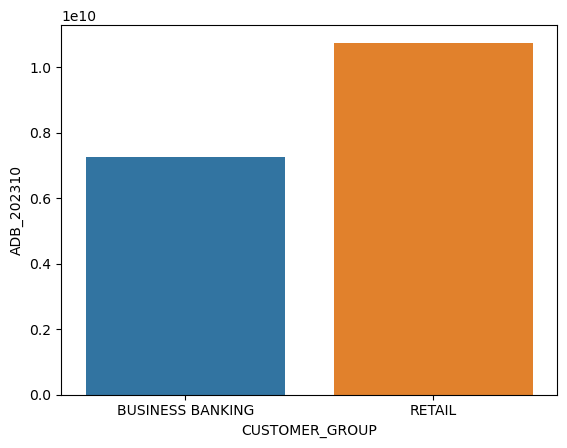

In [7]:
sns.barplot(groups, x='CUSTOMER_GROUP', y='ADB_202310', hue='CUSTOMER_GROUP')

In [8]:
test = groups.T.reset_index()

In [9]:
test['index'] = test['index'].apply(lambda x: x.split('_')[-1])

In [10]:
test['index'] = test['index'].apply(lambda x: x[:4] + '-' + x[4:])

In [11]:
test

CUSTOMER_GROUP,index,BUSINESS BANKING,RETAIL
0,2023-10,7.253524e+09,1.074875e+10
1,2023-11,7.184629e+09,1.069661e+10
2,2023-12,7.103534e+09,1.085361e+10
3,2024-01,7.108010e+09,1.071495e+10
4,2024-02,7.192776e+09,1.073544e+10
5,2024-03,7.351259e+09,1.079449e+10


In [12]:
test['index'] = pd.to_datetime(test['index'], yearfirst=True)

<Axes: xlabel='index', ylabel='BUSINESS BANKING'>

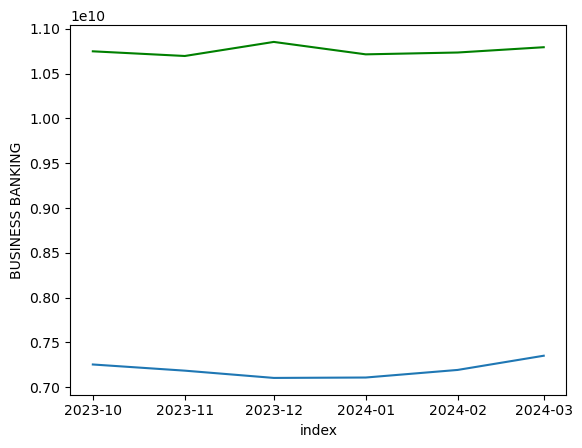

In [13]:
sns.lineplot(test, x='index', y='BUSINESS BANKING')
sns.lineplot(test, x='index', y='RETAIL', color='green')

# LOAN_Q42023_Q12024.parquet

In [14]:
loan_data = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/LOAN_Q42023_Q12024.parquet')
loan_data

,CUSTOMER_ID,LOAN_ACCOUNT_ID,LOAN_STATUS,LOAN_BEHAVIOR,LOAN_TYPE,LOAN_AMOUNT,PRINCIPAL_LOAN_AMOUNT,INTEREST_EARNED,LOAN_START_DATE,MATURITY_DATE
0,1.001572e+07,1.279301e+08,Active,Amortization Past Due,Housing,1000001.67,545604.79,1.76,2010-11-26,2030-06-26
1,1.242506e+07,8.079647e+06,Active,Items for litigation,Auto,699300.74,1.74,0.85,2013-09-19,2018-09-19
2,1.404520e+07,5.842790e+06,Active,Current,Housing,1463999.80,820466.13,-0.09,2013-10-03,2028-12-03
3,9.421564e+07,8.897498e+07,Active,Current,Housing,3779999.85,634380.58,-0.06,2014-10-13,2024-12-13
4,8.624422e+07,1.427227e+08,Active,Current,Housing,1080000.92,236938.12,1.01,2014-12-19,2025-04-19
...,...,...,...,...,...,...,...,...,...,...
35713,1.187123e+08,8.848804e+07,Active,Current,Personal Loans,15000.73,15000.73,1.01,2024-03-27,2027-03-27
35714,1.407766e+08,6.134518e+07,Active,Current,Personal Loans,94999.59,94999.59,-0.16,2024-03-27,2026-09-27
35715,1.379087e+08,1.578804e+07,Active,Current,Personal Loans,59998.90,59998.90,-0.93,2024-03-27,2025-03-27
35716,5.796677e+07,9.035947e+07,Active,Current,Personal Loans,130000.85,130000.85,1.13,2024-03-27,2027-03-27


In [15]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35718 entries, 0 to 35717
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CUSTOMER_ID            35718 non-null  float64       
 1   LOAN_ACCOUNT_ID        35718 non-null  float64       
 2   LOAN_STATUS            35718 non-null  object        
 3   LOAN_BEHAVIOR          35718 non-null  object        
 4   LOAN_TYPE              35718 non-null  object        
 5   LOAN_AMOUNT            35718 non-null  float64       
 6   PRINCIPAL_LOAN_AMOUNT  35718 non-null  float64       
 7   INTEREST_EARNED        35718 non-null  float64       
 8   LOAN_START_DATE        35718 non-null  datetime64[ms]
 9   MATURITY_DATE          35718 non-null  datetime64[ms]
dtypes: datetime64[ms](2), float64(5), object(3)
memory usage: 2.7+ MB


In [16]:
loan_data['days'] = loan_data['MATURITY_DATE'] - loan_data['LOAN_START_DATE']

In [17]:
filtered = loan_data.loc[loan_data['LOAN_STATUS'] == 'Active', ['LOAN_TYPE', 'LOAN_AMOUNT', 'PRINCIPAL_LOAN_AMOUNT', 'INTEREST_EARNED', 'days', 'LOAN_BEHAVIOR']]
filtered['days'] = filtered['days'].astype(int) / 86_400_000

In [18]:
filtered

,LOAN_TYPE,LOAN_AMOUNT,PRINCIPAL_LOAN_AMOUNT,INTEREST_EARNED,days,LOAN_BEHAVIOR
0,Housing,1000001.67,545604.79,1.76,7152.0,Amortization Past Due
1,Auto,699300.74,1.74,0.85,1826.0,Items for litigation
2,Housing,1463999.80,820466.13,-0.09,5540.0,Current
3,Housing,3779999.85,634380.58,-0.06,3714.0,Current
4,Housing,1080000.92,236938.12,1.01,3774.0,Current
...,...,...,...,...,...,...
35713,Personal Loans,15000.73,15000.73,1.01,1095.0,Current
35714,Personal Loans,94999.59,94999.59,-0.16,914.0,Current
35715,Personal Loans,59998.90,59998.90,-0.93,365.0,Current
35716,Personal Loans,130000.85,130000.85,1.13,1095.0,Current


In [80]:
filtered.loc[:,'LOAN_TYPE':'days']

,LOAN_TYPE,LOAN_AMOUNT,PRINCIPAL_LOAN_AMOUNT,INTEREST_EARNED,days
0,Housing,1000001.67,545604.79,1.76,7152.0
1,Auto,699300.74,1.74,0.85,1826.0
2,Housing,1463999.80,820466.13,-0.09,5540.0
3,Housing,3779999.85,634380.58,-0.06,3714.0
4,Housing,1080000.92,236938.12,1.01,3774.0
...,...,...,...,...,...
35713,Personal Loans,15000.73,15000.73,1.01,1095.0
35714,Personal Loans,94999.59,94999.59,-0.16,914.0
35715,Personal Loans,59998.90,59998.90,-0.93,365.0
35716,Personal Loans,130000.85,130000.85,1.13,1095.0


In [75]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

In [78]:
classes = filtered['LOAN_BEHAVIOR']
predictors = filtered.loc[:,'PRINCIPAL_LOAN_AMOUNT':'days']

bamboo_tree = tree.DecisionTreeClassifier(max_depth=5)
bamboo_tree.fit(predictors, classes)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


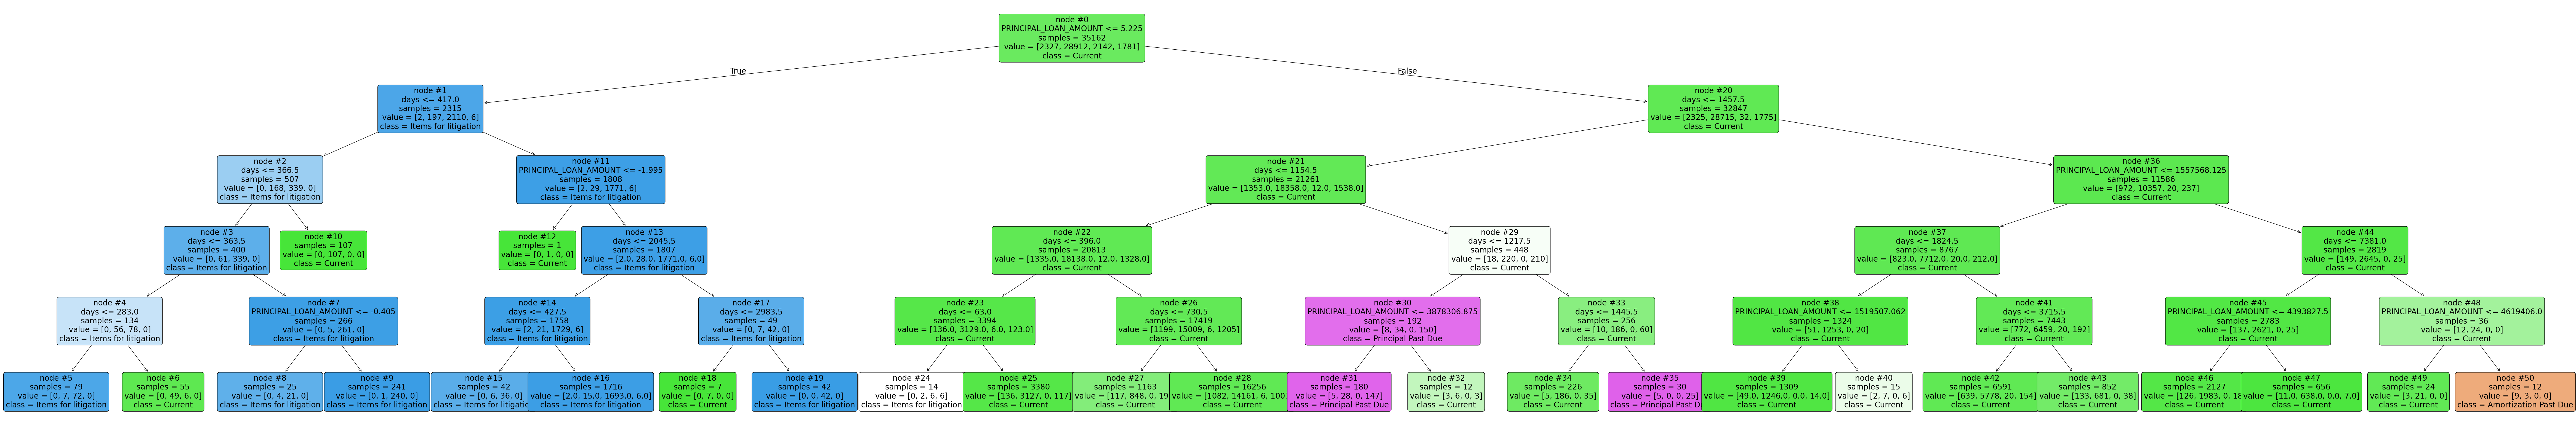

In [79]:
plt.figure(figsize=(120,20))  # customize according to the size of your tree
_ = tree.plot_tree(bamboo_tree,
                   feature_names = list(predictors.columns.values),
                   class_names=np.unique(classes),filled=True,
                   node_ids=True,
                   impurity=False,
                   label="all",
                   fontsize=20, rounded = True)
plt.show()

<Axes: >

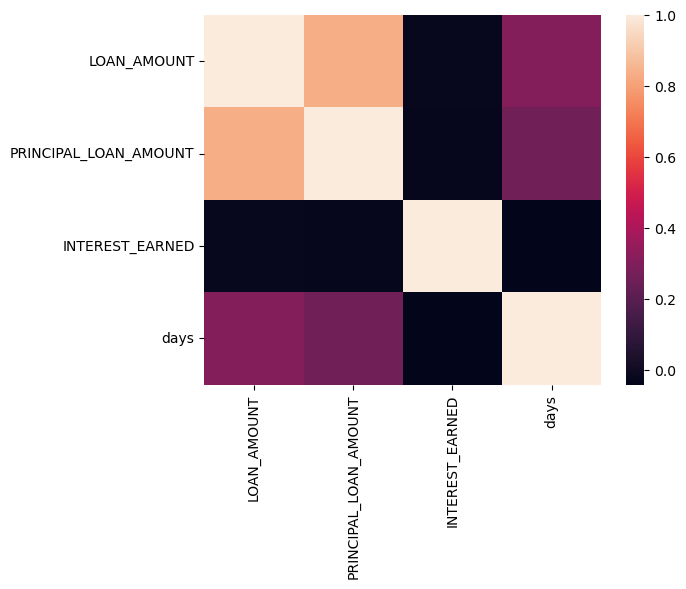

In [72]:
sns.heatmap(filtered.corr(numeric_only=True, method='pearson'))

In [24]:
def get_predictor_entropy(
    dataframe: pd.DataFrame, 
    column: str, 
    decision_class: str = 'class'
    ) -> dict:
    
    categories: list = dataframe[column].unique()
    class_entropy: int = calc_entropy(dataframe[decision_class])

    entropy_dict = dict()
    for i in categories:
        col = dataframe[dataframe[column] == i][decision_class].value_counts()
        entropy_dict[i] = calc_entropy(col)


    predictors_entropy: int = sum(map(
        lambda x: \
            dataframe[column].value_counts()[x] / len(dataframe[column]) * entropy_dict[x], \
            entropy_dict))    
            
    entropy_dict[f"Entropy"] = predictors_entropy
    entropy_dict[f"Gain"] = class_entropy - predictors_entropy

    return entropy_dict

In [25]:
def get_highest_gain(dataframe: pd.DataFrame, predictors: list, decision_class: str = 'class') -> tuple:
    
    gain_dict = dict()
    for i in predictors:
        gain_dict[i] = get_predictor_entropy(dataframe, i, decision_class)["Gain"]

    max_gain = max(gain_dict)
    return max_gain, gain_dict[max_gain]
        

In [26]:
def get_predictors(dataframe, decision_class) -> list:
    return set(dataframe.columns) - {decision_class}

In [27]:
def calc_entropy(series):
    value_counts = series.value_counts(normalize=True)
    entropy = -np.sum(value_counts * np.log2(value_counts))
    return abs(entropy)

In [28]:
predictors1 = get_predictors(filtered, 'LOAN_BEHAVIOR')
get_highest_gain(filtered, predictors1, 'LOAN_BEHAVIOR')

KeyboardInterrupt: 

In [ ]:
filtered2 = filtered[filtered['LOAN_BEHAVIOR'] == False].drop('LOAN_BEHAVIOR', axis=1)
filtered2

,LOAN_TYPE,LOAN_AMOUNT,PRINCIPAL_LOAN_AMOUNT,INTEREST_EARNED,days


# CCTRANSACTIONS_Q42023_Q12024

In [52]:
cc = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/CCTRANSACTIONS_Q42023_Q12024.parquet')
cc

,CUSTOMER_ID,CC_ACCOUNT_ID,MCC_CODE,TRANSACTION_AMOUNT,TRANSACTION_DATE,CARD_TYPE,CHANNEL
0,1.034364e+08,1.057741e+08,5411,1760.33,2023-10-01,PRE-NUMBERED EXPRESS CASH,PHYSICAL
1,1.030679e+08,6.238838e+07,5734,2719.64,2023-10-01,EMV Gold MC,ONLINE
2,8.738459e+07,4.900106e+07,5399,195.24,2023-10-01,Magstripe-Blue MC,ONLINE
3,1.034364e+08,1.057741e+08,5814,2469.54,2023-10-01,PRE-NUMBERED EXPRESS CASH,PHYSICAL
4,1.096100e+07,4.889572e+07,5814,251.62,2023-10-01,EMV Gold MC,ONLINE
...,...,...,...,...,...,...,...
535487,6.576957e+07,4.644408e+07,5541,4001.03,2024-03-27,EMV Gold MC,PHYSICAL
535488,1.302231e+08,8.134139e+07,5912,1501.13,2024-03-27,EMV Gold MC,PHYSICAL
535489,8.411550e+07,5.596352e+07,4814,199.31,2024-03-27,EMV Blue MC,ONLINE
535490,5.269180e+07,1.067314e+08,4814,2700.51,2024-03-29,BPI Platinum Rewards MC,ONLINE


In [36]:
cc['CHANNEL'].unique()

array(['PHYSICAL', 'ONLINE', 'INSTALLMENT'], dtype=object)

<Axes: xlabel='CHANNEL', ylabel='TRANSACTION_AMOUNT'>

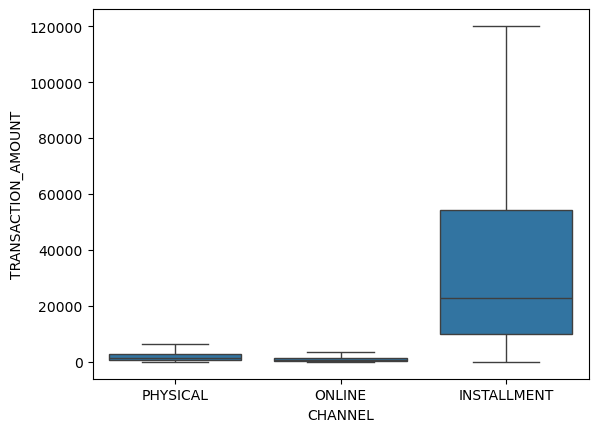

In [ ]:
sns.boxplot(data=cc, y='CHANNEL', x='TRANSACTION_AMOUNT', showfliers=False)

In [54]:
cc['TRANSACTION_AMOUNT_roll'] = cc['TRANSACTION_AMOUNT'].rolling(window=30).mean()

<Axes: xlabel='TRANSACTION_DATE', ylabel='TRANSACTION_AMOUNT'>

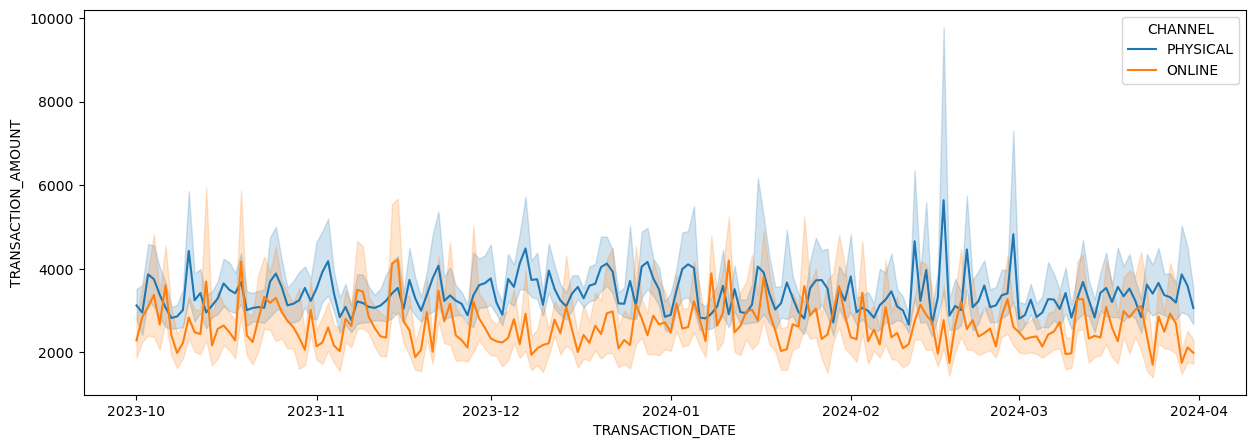

In [59]:
fig, cc_ax = plt.subplots(figsize=(15,5))
sns.lineplot(ax=cc_ax, data=cc[cc['CHANNEL'] != 'INSTALLMENT'], y='TRANSACTION_AMOUNT', x='TRANSACTION_DATE', hue='CHANNEL')

In [60]:
cc

,CUSTOMER_ID,CC_ACCOUNT_ID,MCC_CODE,TRANSACTION_AMOUNT,TRANSACTION_DATE,CARD_TYPE,CHANNEL,TRANSACTION_AMOUNT_roll
0,1.034364e+08,1.057741e+08,5411,1760.33,2023-10-01,PRE-NUMBERED EXPRESS CASH,PHYSICAL,NaN
1,1.030679e+08,6.238838e+07,5734,2719.64,2023-10-01,EMV Gold MC,ONLINE,NaN
2,8.738459e+07,4.900106e+07,5399,195.24,2023-10-01,Magstripe-Blue MC,ONLINE,NaN
3,1.034364e+08,1.057741e+08,5814,2469.54,2023-10-01,PRE-NUMBERED EXPRESS CASH,PHYSICAL,NaN
4,1.096100e+07,4.889572e+07,5814,251.62,2023-10-01,EMV Gold MC,ONLINE,NaN
...,...,...,...,...,...,...,...,...
535487,6.576957e+07,4.644408e+07,5541,4001.03,2024-03-27,EMV Gold MC,PHYSICAL,18568.399000
535488,1.302231e+08,8.134139e+07,5912,1501.13,2024-03-27,EMV Gold MC,PHYSICAL,18561.419000
535489,8.411550e+07,5.596352e+07,4814,199.31,2024-03-27,EMV Blue MC,ONLINE,18557.749000
535490,5.269180e+07,1.067314e+08,4814,2700.51,2024-03-29,BPI Platinum Rewards MC,ONLINE,18611.990667


# BPIAPP_Q42023_Q12024.parquet

In [62]:
app = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/BPIAPP_Q42023_Q12024.parquet')
app

,CUSTOMER_ID,APP_ACCOUNT_ID,TRANSACTION_TYPE,TRANSACTION_AMOUNT,CHANNEL
0,2.887229e+07,1.281126e+07,FT TO ANYONE,10001.67,MOBILE
1,4.974514e+07,NaN,FT TO ANYONE,5175.74,MOBILE
5,1.158223e+08,6.491563e+07,BILLS PAYMENT,2501.16,MOBILE
6,1.158223e+08,6.491563e+07,BILLS PAYMENT,1297.38,MOBILE
7,1.158223e+08,6.491563e+07,BILLS PAYMENT,1500.67,MOBILE
...,...,...,...,...,...
1545603,2.039153e+07,1.025135e+08,FT TO ANYONE,17999.30,MOBILE
1545606,1.118995e+07,1.155520e+08,FT TO ANYONE,16801.22,MOBILE
1545607,1.071644e+08,9.884504e+07,FT TO ANYONE,5001.70,MOBILE
1545608,1.002153e+07,9.500361e+07,PARTNER API,98.72,OPEN BANKING


In [63]:
app['CHANNEL'].unique()

array(['MOBILE', 'OPEN BANKING', 'WEB'], dtype=object)

<Axes: xlabel='TRANSACTION_AMOUNT', ylabel='CHANNEL'>

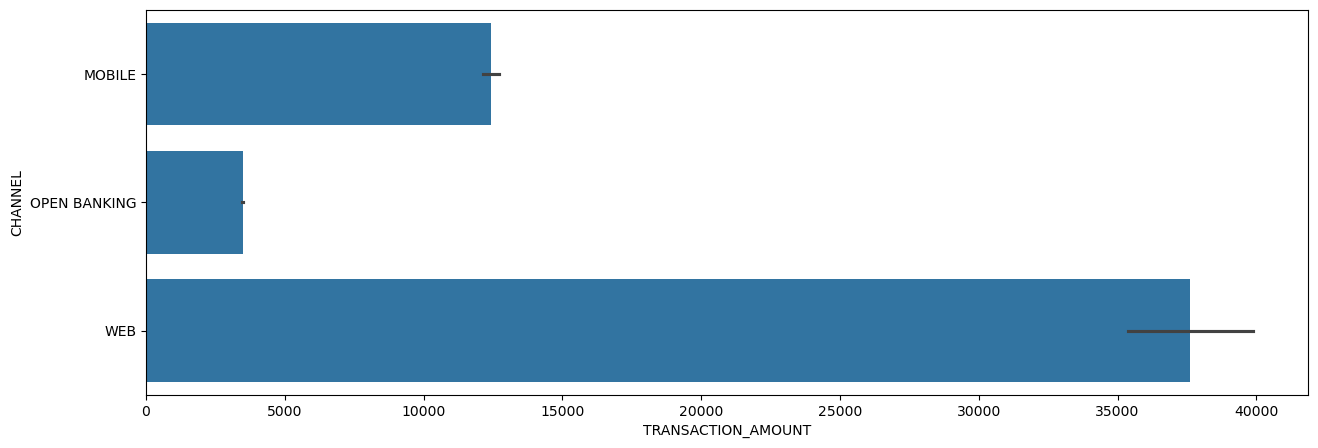

In [66]:
fig2, app_ax = plt.subplots(figsize=(15,5))
sns.barplot(ax=app_ax, data=app, x='TRANSACTION_AMOUNT', y='CHANNEL')

# PRODUCTS_Q42023_Q12024.parquet

In [2]:
products = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/PRODUCTS_Q42023_Q12024.parquet')
products

,CUSTOMER_ID,SAVINGS_ACCOUNT_INDICATOR,CHECKING_ACCOUNT_INDICATOR,TIME_DEPOSIT_ACCOUNT_INDICATOR,AUTO_LOAN_INDICATOR,HOUSING_LOAN_INDICATOR,PERSONAL_LOAN_INDICATOR,BB_LOAN_INDICATOR,LIFE_INSURANCE_INDICATOR,NONLIFE_INSURANCE_INDICATOR,INVESTMENT_INDICATOR,CURRENT_MONTH
0,4.302857e+03,1,0,0,0,0,0,0,0,0,0,10/2023
1,4.915714e+03,1,0,0,0,0,0,0,0,0,0,10/2023
2,5.658571e+03,1,0,0,0,0,0,0,1,0,0,10/2023
3,8.045714e+03,0,0,0,0,0,0,0,0,0,0,10/2023
4,1.047429e+04,0,0,0,0,0,0,0,1,0,0,10/2023
...,...,...,...,...,...,...,...,...,...,...,...,...
522404,1.428346e+08,1,0,0,0,0,0,0,0,0,0,03/2024
522405,1.428414e+08,0,0,0,0,0,0,0,0,0,0,03/2024
522406,1.428492e+08,1,1,0,0,0,1,1,1,0,0,03/2024
522407,1.428498e+08,0,0,0,0,0,0,0,0,0,0,03/2024


In [4]:
products.iloc[:,1:]

,SAVINGS_ACCOUNT_INDICATOR,CHECKING_ACCOUNT_INDICATOR,TIME_DEPOSIT_ACCOUNT_INDICATOR,AUTO_LOAN_INDICATOR,HOUSING_LOAN_INDICATOR,PERSONAL_LOAN_INDICATOR,BB_LOAN_INDICATOR,LIFE_INSURANCE_INDICATOR,NONLIFE_INSURANCE_INDICATOR,INVESTMENT_INDICATOR,CURRENT_MONTH
0,1,0,0,0,0,0,0,0,0,0,10/2023
1,1,0,0,0,0,0,0,0,0,0,10/2023
2,1,0,0,0,0,0,0,1,0,0,10/2023
3,0,0,0,0,0,0,0,0,0,0,10/2023
4,0,0,0,0,0,0,0,1,0,0,10/2023
...,...,...,...,...,...,...,...,...,...,...,...
522404,1,0,0,0,0,0,0,0,0,0,03/2024
522405,0,0,0,0,0,0,0,0,0,0,03/2024
522406,1,1,0,0,0,1,1,1,0,0,03/2024
522407,0,0,0,0,0,0,0,0,0,0,03/2024


In [41]:
products['CURRENT_MONTH'] = products['CURRENT_MONTH'].str.replace('/', '-')

In [42]:
products['CURRENT_MONTH'] = pd.to_datetime(products['CURRENT_MONTH'])

/tmp/ipykernel_5561/136147931.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  products['CURRENT_MONTH'] = pd.to_datetime(products['CURRENT_MONTH'])


In [43]:
products

,CUSTOMER_ID,SAVINGS_ACCOUNT_INDICATOR,CHECKING_ACCOUNT_INDICATOR,TIME_DEPOSIT_ACCOUNT_INDICATOR,AUTO_LOAN_INDICATOR,HOUSING_LOAN_INDICATOR,PERSONAL_LOAN_INDICATOR,BB_LOAN_INDICATOR,LIFE_INSURANCE_INDICATOR,NONLIFE_INSURANCE_INDICATOR,INVESTMENT_INDICATOR,CURRENT_MONTH
0,4.302857e+03,1,0,0,0,0,0,0,0,0,0,2023-10-01
1,4.915714e+03,1,0,0,0,0,0,0,0,0,0,2023-10-01
2,5.658571e+03,1,0,0,0,0,0,0,1,0,0,2023-10-01
3,8.045714e+03,0,0,0,0,0,0,0,0,0,0,2023-10-01
4,1.047429e+04,0,0,0,0,0,0,0,1,0,0,2023-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...
522404,1.428346e+08,1,0,0,0,0,0,0,0,0,0,2024-03-01
522405,1.428414e+08,0,0,0,0,0,0,0,0,0,0,2024-03-01
522406,1.428492e+08,1,1,0,0,0,1,1,1,0,0,2024-03-01
522407,1.428498e+08,0,0,0,0,0,0,0,0,0,0,2024-03-01


In [13]:
for i in products.iloc[:,1:-1]:
    print(i, sum(products.iloc[:,1:-1][i]))

SAVINGS_ACCOUNT_INDICATOR 422044
CHECKING_ACCOUNT_INDICATOR 45362
TIME_DEPOSIT_ACCOUNT_INDICATOR 4240
AUTO_LOAN_INDICATOR 7005
HOUSING_LOAN_INDICATOR 3392
PERSONAL_LOAN_INDICATOR 86522
BB_LOAN_INDICATOR 6900
LIFE_INSURANCE_INDICATOR 34856
NONLIFE_INSURANCE_INDICATOR 10599
INVESTMENT_INDICATOR 11790


# BPIAPP_Q42023_Q12024_V2.parquet

In [15]:
appv2 = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/BPIAPP_Q42023_Q12024_V2.parquet')
appv2

,CUSTOMER_ID,APP_ACCOUNT_ID,TRANSACTION_TYPE,TRANSACTION_AMOUNT,TRANSACTION_DATE,CHANNEL,__index_level_0__
0,2.887229e+07,1.281126e+07,FT TO ANYONE,10001.33,2023-10-01 10:24:39,MOBILE,0
1,4.974514e+07,NaN,FT TO ANYONE,5175.72,2023-10-01 14:18:24,MOBILE,1
2,1.158223e+08,6.491563e+07,BILLS PAYMENT,2499.28,2023-10-01 19:17:04,MOBILE,5
3,1.158223e+08,6.491563e+07,BILLS PAYMENT,1300.27,2023-10-01 19:24:10,MOBILE,6
4,1.158223e+08,6.491563e+07,BILLS PAYMENT,1502.11,2023-10-01 19:19:26,MOBILE,7
...,...,...,...,...,...,...,...
1197427,2.039153e+07,1.025135e+08,FT TO ANYONE,17998.51,2024-03-29 10:39:28,MOBILE,1545603
1197428,1.118995e+07,1.155520e+08,FT TO ANYONE,16799.93,2024-03-27 08:45:46,MOBILE,1545606
1197429,1.071644e+08,9.884504e+07,FT TO ANYONE,4998.74,2024-03-26 21:22:03,MOBILE,1545607
1197430,1.002153e+07,9.500361e+07,PARTNER API,101.06,2024-03-26 21:34:15,OPEN BANKING,1545608


# BIZKOCONSO_Q42023_Q12024.parquet

In [16]:
biz = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/BIZKOCONSO_Q42023_Q12024.parquet')
biz

,CUSTOMER_ID,BB_ACCOUNT_ID,SERVICE,STATUS,TRANSACTION_DATE,TRANSACTION_AMOUNT,CHARGE_AMOUNT
0,1.306301e+06,4.046425e+07,Subscription,Active,2023-10-27,1.67,2.17
1,6.214646e+06,3.887069e+07,Other Bank Transfer,Successful,2023-10-14,600.74,0.74
2,6.214646e+06,3.887069e+07,Other Bank Transfer,Successful,2023-10-14,17003.89,-0.20
3,6.214646e+06,3.887069e+07,Other Bank Transfer,Successful,2023-10-20,18516.37,-0.15
4,6.214646e+06,3.887069e+07,Same Bank Transfer,Successful,2023-10-14,2475.92,0.92
...,...,...,...,...,...,...,...
1731,1.327165e+08,2.076786e+05,Same Bank Transfer,Successful,2024-03-01,755.65,0.65
1732,1.327165e+08,2.076786e+05,Same Bank Transfer,Successful,2024-03-05,2973.23,-1.77
1733,1.327165e+08,2.076786e+05,Same Bank Transfer,Successful,2024-03-15,1565.76,0.76
1734,1.333565e+08,3.686934e+06,Same Bank Transfer,Successful,2024-03-18,893.19,0.33


# CCTRANSACTIONS_Q42023_Q12024.parquet

In [17]:
cc = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/CCCONSO_Q42023_Q12024.parquet')
cc

,CUSTOMER_ID,CC_ACCOUNT_ID,CC_CARD_ID,CARD_TYPE,PAYMENT_BEHAVIOR,CREDIT_LIMIT,TOTAL_BALANCE,CURRENT_MONTH_BILLING,REVOLVING_BALANCE,CREDIT_CARD_LOAN,PREVIOUS_MONTH_INTEREST,PREVIOUS_MONTH_BILLING,CURRENT_MONTH_PAYMENT,CURRENT_MONTH
0,5.962607e+07,8.115176e+07,7.420716e+06,Regular Visa,paid before or on the billing period,350001.67,1.67,1.67,1.67,1.67,1.67,1.67,1.67,10/2023
1,1.240043e+08,1.382189e+08,2.742072e+07,Regular Visa,paid before or on the billing period,600000.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,10/2023
2,1.240043e+08,1.382189e+08,4.170643e+07,Regular Visa,paid before or on the billing period,599999.80,-0.20,NaN,-0.20,NaN,NaN,NaN,NaN,10/2023
3,1.075312e+08,2.986605e+07,7.770643e+07,Regular Visa,paid before or on the billing period,259999.85,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,10/2023
4,7.303243e+07,6.730890e+07,1.142779e+08,Regular Visa,paid during the billing period,650000.92,369531.38,0.92,142077.92,366982.23,4263.23,147985.30,5374.84,10/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143160,5.132595e+07,2.437588e+07,1.330641e+08,EMV Corporate Mastercard,paid during the billing period,299999.09,32836.45,32481.45,-0.91,32836.45,-0.91,90284.25,90284.25,03/2024
143161,5.132595e+07,3.866159e+07,5.921244e+06,EMV Corporate Mastercard,paid during the billing period,50000.51,11245.01,11245.01,0.51,11245.01,0.51,0.51,0.51,03/2024
143162,5.132595e+07,5.294731e+07,2.020696e+07,EMV Corporate Mastercard,paid before or on the billing period,10000.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,03/2024
143163,5.132595e+07,6.723302e+07,3.449267e+07,EMV Corporate Mastercard,paid during the billing period,140001.34,8564.69,8574.69,1.34,8564.69,1.34,15270.07,15280.07,03/2024


# CDNA_Q42023_Q12024.parquet

In [18]:
cdna= pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/CDNA_Q42023_Q12024.parquet')
cdna

,CUSTOMER_ID,GENDER,AGE,MARITAL_STATUS,EDUCATION,BANK_TENURE,CUSTOMER_LOCATION,DIGITAL_INDICATOR,SEC,HOME_OWNER_INDICATOR,CAR_OWNER_INDICATOR,MONTHLY_INCOME,INCOME_SOURCE,ENVIRONMENTAL_AFF_INDICATOR,HUMANITARIAN_AFF_INDICATOR,OF_INDICATOR,RETIREES_INDICATOR,FILCHI_INDICATOR
0,4.598716e+06,FEMALE,43.67,MARRIED,MID,15.50,REGION VII (CENTRAL VISAYAS),TRADITIONAL,C1,Y,N,59465.23,COMMISSION,N,N,N,N,N
1,7.509760e+06,FEMALE,29.74,SINGLE,NO_DATA,2.59,NATIONAL CAPITAL REGION,DIGITAL,C1,Y,N,74533.25,SALARY,N,N,N,N,N
2,9.597760e+06,MALE,30.80,SINGLE,NO_DATA,1.92,NATIONAL CAPITAL REGION,DIGITAL,B2,Y,N,102944.40,SALARY,N,N,N,N,N
3,1.749770e+07,MALE,31.85,SINGLE,MID,14.47,NATIONAL CAPITAL REGION,DIGITAL,B2,Y,N,115609.09,SALARY,N,N,Y,N,N
4,1.758271e+07,FEMALE,53.92,SINGLE,MID,27.25,NATIONAL CAPITAL REGION,DIGITAL,B2,Y,N,128745.85,REMITTANCE,N,N,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92199,1.391106e+08,FEMALE,NaN,SINGLE,NO_DATA,12.98,NO_DATA,NO_DATA,E,N,N,-0.61,NO_DATA,N,N,N,N,N
92200,1.413598e+08,NO_DATA,NaN,SINGLE,NO_DATA,6.37,NO_DATA,NO_DATA,E,N,N,-0.66,NO_DATA,N,N,N,N,N
92201,1.414290e+08,NO_DATA,NaN,NO_DATA,NO_DATA,24.77,NO_DATA,NO_DATA,E,N,N,0.66,NO_DATA,N,N,N,N,N
92202,1.418844e+08,NO_DATA,NaN,NO_DATA,NO_DATA,24.32,NO_DATA,NO_DATA,E,N,N,-1.01,NO_DATA,N,N,N,N,N


# IBFT_INCOMING_Q42023_Q12024.parquet

In [22]:
ibft_in = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/IBFT_INCOMING_Q42023_Q12024.parquet')
ibft_in

,TRANSMITTING_ALIEN_ID,CUSTOMER_ID,ACCOUNT_ID,BPI_ACCOUNT_TYPE,SOURCE_BANK_CODE,TRANSACTION_AMOUNT,TRANSACTION_DATE
0,26882289.67,7.838040e+07,4.551013e+08,SAVINGS ACCOUNT,BANK 35,151.67,2023-10-01
1,11407301.74,1.195635e+08,5.671985e+08,SAVINGS ACCOUNT,BANK 17,1500.74,2023-10-01
2,12086419.80,2.445896e+07,7.162255e+08,SAVINGS ACCOUNT,BANK 1,29999.80,2023-10-01
3,12086419.85,2.445896e+07,7.162255e+08,SAVINGS ACCOUNT,BANK 1,39999.85,2023-10-01
4,33788124.92,8.432627e+07,9.057325e+08,SAVINGS ACCOUNT,BANK 26,1500.92,2023-10-01
...,...,...,...,...,...,...,...
370071,11501127.02,3.644647e+07,8.227271e+08,SAVINGS ACCOUNT,BANK 7,5596.02,2024-03-27
370072,38182567.45,1.247532e+08,2.201102e+08,SAVINGS ACCOUNT,BANK 2,1999.45,2024-03-27
370073,42777755.38,1.252445e+08,5.503445e+08,SAVINGS ACCOUNT,BANK 27,20000.38,2024-03-27
370074,23968388.26,1.006717e+08,1.433672e+08,SAVINGS ACCOUNT,BANK 8,2200.26,2024-03-27


# IBFT_OUTGOING_Q42023_Q12024.parquet

In [21]:
ibft_out = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/IBFT_OUTGOING_Q42023_Q12024.parquet')
ibft_out

,CUSTOMER_ID,ACCOUNT_ID,RECEIVING_ALIEN_ID,RECEIVING_BANK_CODE,TRANSACTION_AMOUNT,TRANSACTION_DATE
0,4.919560e+07,8.940830e+07,3.061918e+06,BANK 1,12501.67,2023-10-01
1,2.936154e+07,8.390155e+07,3.177228e+06,BANK 2,3000.74,2023-10-01
2,1.308383e+08,3.977686e+07,1.031828e+06,BANK 2,17999.80,2023-10-01
3,4.389536e+07,5.691287e+07,5.076808e+06,BANK 3,9999.85,2023-10-01
4,2.693906e+07,5.886424e+07,3.574430e+06,BANK 2,2000.92,2023-10-01
...,...,...,...,...,...,...
339938,3.838652e+07,8.644802e+07,5.988383e+06,BANK 51,143.34,2024-03-10
339939,5.903460e+07,1.094282e+08,6.277682e+06,BANK 51,30000.42,2024-03-25
339940,5.903460e+07,1.094282e+08,6.277682e+06,BANK 51,20000.41,2024-03-24
339941,5.903460e+07,1.094282e+08,6.277682e+06,BANK 51,20000.85,2024-03-23


# SEGMENTS_Q42023_Q12024.parquet

In [23]:
segments = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/SEGMENTS_Q42023_Q12024.parquet')
segments

,CUSTOMER_ID,CUSTOMER_GROUP,CUSTOMER_SEGMENT
0,1.371880e+08,RETAIL,Tier 6
1,7.363929e+07,RETAIL,Tier 6
2,6.190229e+07,RETAIL,Tier 6
3,6.333086e+07,RETAIL,Tier 6
4,3.761657e+07,RETAIL,Tier 6
...,...,...,...
99995,1.858279e+07,BUSINESS BANKING,None
99996,5.800595e+07,BUSINESS BANKING,None
99997,7.410509e+07,BUSINESS BANKING,None
99998,1.393309e+08,BUSINESS BANKING,None


# DEBITPOS_Q42023_Q12024.parquet

In [24]:
debit = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/DEBITPOS_Q42023_Q12024.parquet')
debit

,CUSTOMER_ID,TRANSACTION_TYPE,TRANSACTION_AMOUNT,TRANSACTION_DATE,MCC_CODE
0,5.866587e+06,PHYSICAL,193.92,2023-10-01,6012
1,5.156950e+07,PHYSICAL,152.84,2023-10-01,6012
2,3.635190e+07,PHYSICAL,4266.10,2023-10-01,6012
3,1.222160e+08,PHYSICAL,308.85,2023-10-01,6012
4,6.068777e+07,PHYSICAL,686.92,2023-10-01,5814
...,...,...,...,...,...
333563,1.283340e+08,PHYSICAL,109.72,2024-03-31,5691
333564,9.164735e+07,PHYSICAL,1857.61,2024-03-31,6012
333565,1.130342e+08,ONLINE,456.88,2024-03-31,7311
333566,3.495600e+07,PHYSICAL,4810.26,2024-03-31,6012


# CCCONSO_Q42023_Q12024

In [25]:
conso = pd.read_parquet('/config/BPI-Data-Wave-2024/BPI DATA Wave Hackathon Kit/Data/CCCONSO_Q42023_Q12024.parquet')
conso

,CUSTOMER_ID,CC_ACCOUNT_ID,CC_CARD_ID,CARD_TYPE,PAYMENT_BEHAVIOR,CREDIT_LIMIT,TOTAL_BALANCE,CURRENT_MONTH_BILLING,REVOLVING_BALANCE,CREDIT_CARD_LOAN,PREVIOUS_MONTH_INTEREST,PREVIOUS_MONTH_BILLING,CURRENT_MONTH_PAYMENT,CURRENT_MONTH
0,5.962607e+07,8.115176e+07,7.420716e+06,Regular Visa,paid before or on the billing period,350001.67,1.67,1.67,1.67,1.67,1.67,1.67,1.67,10/2023
1,1.240043e+08,1.382189e+08,2.742072e+07,Regular Visa,paid before or on the billing period,600000.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,10/2023
2,1.240043e+08,1.382189e+08,4.170643e+07,Regular Visa,paid before or on the billing period,599999.80,-0.20,NaN,-0.20,NaN,NaN,NaN,NaN,10/2023
3,1.075312e+08,2.986605e+07,7.770643e+07,Regular Visa,paid before or on the billing period,259999.85,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,10/2023
4,7.303243e+07,6.730890e+07,1.142779e+08,Regular Visa,paid during the billing period,650000.92,369531.38,0.92,142077.92,366982.23,4263.23,147985.30,5374.84,10/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143160,5.132595e+07,2.437588e+07,1.330641e+08,EMV Corporate Mastercard,paid during the billing period,299999.09,32836.45,32481.45,-0.91,32836.45,-0.91,90284.25,90284.25,03/2024
143161,5.132595e+07,3.866159e+07,5.921244e+06,EMV Corporate Mastercard,paid during the billing period,50000.51,11245.01,11245.01,0.51,11245.01,0.51,0.51,0.51,03/2024
143162,5.132595e+07,5.294731e+07,2.020696e+07,EMV Corporate Mastercard,paid before or on the billing period,10000.57,0.57,0.57,0.57,0.57,0.57,0.57,0.57,03/2024
143163,5.132595e+07,6.723302e+07,3.449267e+07,EMV Corporate Mastercard,paid during the billing period,140001.34,8564.69,8574.69,1.34,8564.69,1.34,15270.07,15280.07,03/2024
